### ДЗ

#### Классификация изображений из датасета CIFAR-10

Датасет CIFAR-10 содержит 60,000 цветных изображений размером 32x32, разбитых на 10 классов. Нужно предсказать класс изображения.




```
import tensorflow as tf

# Загрузка данных CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
```

Не забудьте про:
- Нормализацию данных
- Преобразование меток в one-hot encoding


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import tensorflow as tf
print("We're using TF", tf.__version__)
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import pandas as pd

# Загрузка данных CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

We're using TF 2.17.0


In [ ]:
print(X_train.shape)
print(X_test.shape)
y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)
print(y_train[:10])
print(y_test[:10])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[6 9 9 4 1 1 2 7 8 3]
[3 8 8 0 6 6 1 6 3 1]


Пример картинки:


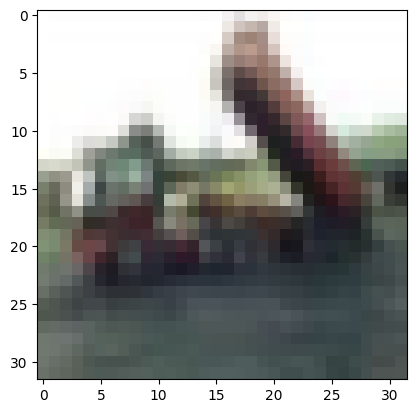

In [ ]:
# Преобразование изображения для дальнейшей визуализации
x_train_image = np.tile(X_train[2, :, :].reshape((32, 32, 3)), (1, 1, 1))

# Вывод всего изображения
print("Пример картинки:")
plt.imshow(x_train_image)
plt.show()

In [ ]:
# Преобразуем метки в формат one-hot, где для каждого класса создается бинарный вектор длины 10
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_test_oh = keras.utils.to_categorical(y_test, 10)

# Вывод информации о форме массива one-hot закодированных меток y_train
print(y_train_oh.shape)

print(y_train_oh[:5], y_train[:5])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] [6 9 9 4 1]


In [ ]:
K.clear_session()

model = M.Sequential()

# Добавление сверточного слоя (Conv2D) с 32 фильтрами 3x3, шагом 1 и сохранением размерности (padding='same')
# Входной слой принимает изображение размером 32x32 с тремя каналами (RGB изображение)
model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same', input_shape=(32, 32, 3)))

model.add(L.MaxPool2D())

model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))

model.add(L.MaxPool2D())

model.add(L.Conv2D(128, kernel_size=3, strides=1, padding='same'))

model.add(L.MaxPool2D())

model.add(L.Flatten())

model.add(L.Dense(1024, activation='relu'))
model.add(L.Dropout(0.3))

model.add(L.Dense(10, activation='softmax'))

In [ ]:
# Вывод краткого описания модели
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,201,674 (8.40 MB)

 Trainable params: 2,201,674 (8.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
X_train_float = X_train.astype(float) / 255 - 0.5
X_test_float = X_test.astype(float) / 255 - 0.5

In [ ]:
# Обучение модели на тренировочных данных
model.fit(
    X_train_float,
    y_train_oh,
    batch_size=32,
    epochs=5,
    validation_data=(X_test_float, y_test_oh)
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 119ms/step - accuracy: 0.4920 - loss: 1.4224 - val_accuracy: 0.6777 - val_loss: 0.9244
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.7221 - loss: 0.8006 - val_accuracy: 0.7275 - val_loss: 0.8008
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.7918 - loss: 0.6064 - val_accuracy: 0.7325 - val_loss: 0.7926
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 120ms/step - accuracy: 0.8504 - loss: 0.4388 - val_accuracy: 0.7483 - val_loss: 0.7864
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 120ms/step - accuracy: 0.8919 - loss: 0.3142 - val_accuracy: 0.7536 - val_loss: 0.8492


In [ ]:
model.evaluate(X_test_float, y_test_oh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7562 - loss: 0.8328


[0.8492346405982971, 0.753600001335144]